In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
main_dir = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/stanford-hmp2'
x_rcc_test_file = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/alignment_RCC_2024_Feb_27/April_30_Finetune_Data/X_finetune_test.csv'

x_rcc_test = pd.read_csv(x_rcc_test_file, index_col=0)

In [3]:
main_alignment = pd.read_csv(f'{main_dir}/alignment_df.csv', index_col=0)
# intensity_matrix = pd.read_csv(f'{main_dir}/combined_study.csv', index_col=0)
main_metadata = pd.read_csv(f'{main_dir}/stanford-hmp2_metadata.tsv', index_col=0, sep='\t')

In [4]:
main_alignment.dropna(axis=0, how='all', inplace=True)
main_alignment

,627
541,
FT1740,FT2012
FT2429,FT2661
FT9541,FT14822
FT1566,FT1829
FT2371,FT2743
...,...
FT2628,FT3038
FT10863,FT16514
FT5060,FT6957


In [5]:
sample_info = pd.read_csv(f'{main_dir}/sample_info.csv', index_col=0)
poolmap_intensity = pd.read_csv(f'{main_dir}/final_peaks_intensity_max_pool_map_norm.csv', index_col=0)

In [6]:
chosen_stanford_feats = main_alignment['627'].values
corresponding_rcc_feats = main_alignment.index
intensity_matrix = poolmap_intensity.loc[chosen_stanford_feats].copy()

intensity_matrix.index = corresponding_rcc_feats.to_list()


In [7]:
intensity_matrix.head()

,HILIC-pos-B1_MixAA_Mix.mzML,HILIC-pos-B1_MixOrgAcids_MixOthers.mzML,HILIC-pos-B1_Mix1.mzML,HILIC-pos-B1_Mix2.mzML,HILIC-pos-B1_QC_dln2.mzML,HILIC-pos-B1_QC_dln4.mzML,HILIC-pos-B1_QC_dln8.mzML,HILIC-pos-B1_QC1.mzML,HILIC-pos-B1_QC1_MSMS_NCE25.mzML,ZN3TBJM-1013_HILIC-pos-B1.mzML,...,Exercise_HILIC-pos_ZRB0F6P-E12.mzML,Exercise_HILIC-pos_ZTL5S2Y-E14.mzML,Exercise_HILIC-pos_ZMBVNFM-E11.mzML,Exercise_HILIC-pos_ZN3TBJM-E17.mzML,Exercise_HILIC-pos_ZPMBHPS-E18.mzML,Exercise_HILIC-pos_ZPEL6L3-E18.mzML,Exercise_HILIC-pos_ZJBOZ2X-E13.mzML,Exercise_HILIC-pos_ZWFDEY0-E18.mzML,Exercise_HILIC-pos_ZS78KHV-E17.mzML,Exercise_HILIC-pos_QC40.mzML
FT1740,NaN,401781.3,NaN,NaN,NaN,42827.598,107270.05,53680.105,NaN,31229.166,...,117583.78,80773.310,93697.08,94211.700,107601.570,108832.695,70556.23,91846.805,105422.07,92459.990
FT2429,NaN,NaN,NaN,NaN,59037.68,59037.680,59037.68,59037.680,59037.68,113016.766,...,NaN,62892.168,NaN,55483.863,45540.450,NaN,NaN,30339.035,NaN,NaN
FT9541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FT1566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,61590.566,NaN,NaN,NaN,NaN,52753.758
FT2371,1319073.6,NaN,NaN,NaN,285619.34,NaN,NaN,204586.000,187378.55,240042.480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260503.660


In [8]:
# fill the missing values with the mean of the row
tr_intesity_matrix = intensity_matrix.T
tr_intesity_matrix.fillna(tr_intesity_matrix.mean(), inplace=True)
intensity_matrix = np.log2(tr_intesity_matrix.T)

In [9]:
intensity_matrix

,HILIC-pos-B1_MixAA_Mix.mzML,HILIC-pos-B1_MixOrgAcids_MixOthers.mzML,HILIC-pos-B1_Mix1.mzML,HILIC-pos-B1_Mix2.mzML,HILIC-pos-B1_QC_dln2.mzML,HILIC-pos-B1_QC_dln4.mzML,HILIC-pos-B1_QC_dln8.mzML,HILIC-pos-B1_QC1.mzML,HILIC-pos-B1_QC1_MSMS_NCE25.mzML,ZN3TBJM-1013_HILIC-pos-B1.mzML,...,Exercise_HILIC-pos_ZRB0F6P-E12.mzML,Exercise_HILIC-pos_ZTL5S2Y-E14.mzML,Exercise_HILIC-pos_ZMBVNFM-E11.mzML,Exercise_HILIC-pos_ZN3TBJM-E17.mzML,Exercise_HILIC-pos_ZPMBHPS-E18.mzML,Exercise_HILIC-pos_ZPEL6L3-E18.mzML,Exercise_HILIC-pos_ZJBOZ2X-E13.mzML,Exercise_HILIC-pos_ZWFDEY0-E18.mzML,Exercise_HILIC-pos_ZS78KHV-E17.mzML,Exercise_HILIC-pos_QC40.mzML
FT1740,15.211345,18.616051,15.211345,15.211345,15.211345,15.386253,16.710888,15.712100,15.211345,14.930606,...,16.843330,16.301591,16.515716,16.523619,16.715340,16.731753,16.106486,16.486942,16.685817,16.496542
FT2429,16.002901,16.002901,16.002901,16.002901,15.849348,15.849348,15.849348,15.849348,15.849348,16.786177,...,16.002901,15.940593,16.002901,15.759781,15.474861,16.002901,16.002901,14.888888,16.002901,16.002901
FT9541,15.766003,15.766003,15.766003,15.766003,15.766003,15.766003,15.766003,15.766003,15.766003,15.766003,...,15.766003,15.766003,15.766003,15.766003,15.766003,15.766003,15.766003,15.766003,15.766003,15.766003
FT1566,15.951857,15.951857,15.951857,15.951857,15.951857,15.951857,15.951857,15.951857,15.951857,15.951857,...,15.951857,15.951857,15.951857,15.951857,15.910422,15.951857,15.951857,15.951857,15.951857,15.686986
FT2371,20.331094,17.931204,17.931204,17.931204,18.123734,17.931204,17.931204,17.642348,17.515596,17.872930,...,17.931204,17.931204,17.931204,17.931204,17.931204,17.931204,17.931204,17.931204,17.931204,17.990944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT2628,16.939930,16.939930,22.156744,16.939930,16.939930,16.939930,16.939930,16.939930,16.939930,16.939930,...,17.549486,16.311717,17.752263,16.429925,16.914024,17.239353,17.037608,16.511375,17.853897,17.083489
FT10863,19.108804,19.108804,19.108804,19.108804,19.050584,19.050584,19.050584,19.050584,19.050584,19.078269,...,19.108804,18.795815,19.108804,18.934760,18.938672,19.038423,18.856286,19.006139,19.129833,19.050584
FT5060,17.319740,17.319740,17.319740,17.319740,16.608008,14.622166,17.319740,15.616676,17.319740,17.439054,...,15.488636,17.319740,17.319740,17.319740,17.319740,17.319740,17.319740,17.319740,17.319740,17.319740
FT8220,16.766961,16.766961,16.766961,16.766961,16.744827,16.982090,16.766961,16.766961,16.766961,16.766961,...,16.766961,16.766961,16.766961,16.766961,16.268746,16.766961,16.766961,16.766961,15.478410,16.766961


In [10]:
main_metadata.head()

,subject ID,Study,Race,Age,BMI,SSPG,IR_IS_classification,CollectionDate,Event,Event_Note1,Event_Note2,Event_Note3,SubStudy
file name,,,,,,,,,,,,,
ZN3TBJM-1013_HILIC-pos-B1,ZN3TBJM,HMP,C,67.47,30.18,133.5,IS,623.0,Infection,D7,NaN,Infection_Late,HMP
ZNED4XZ-4014_HILIC-pos-B1,ZNED4XZ,HMP,C,59.21,31.64,NaN,Unknown,503.0,Ant_L,D21,amoxicillin,Ant_Recovery_Early,HMP
ZLZNCLZ-2013_HILIC-pos-B1,ZLZNCLZ,HMP,C,54.74,27.33,130.0,IS,622.0,Imz,D3,flu,Imz_Middle,HMP
ZLZQMEV-07_HILIC-pos-B1,ZLZQMEV,HMP,H,61.00,29.99,221.0,IR,727.0,Healthy,NaN,NaN,NaN,HMP
ZN0JE53-02_HILIC-pos-B1,ZN0JE53,HMP,B,66.81,33.32,148.0,IS,327.0,Weight-gain,NaN,NaN,NaN,HMP


In [11]:
main_metadata['file name'] = main_metadata.index
main_metadata['mzml_file'] = main_metadata['file name'].apply(lambda x: x+'.mzML')

In [12]:
main_metadata.index = main_metadata['mzml_file']

In [13]:
main_metadata =main_metadata.join(sample_info)

In [14]:
main_metadata

,subject ID,Study,Race,Age,BMI,SSPG,IR_IS_classification,CollectionDate,Event,Event_Note1,Event_Note2,Event_Note3,SubStudy,file name,mzml_file,timestamp,Ref,runtime_hour,batch_id,run_order
mzml_file,,,,,,,,,,,,,,,,,,,,
ZN3TBJM-1013_HILIC-pos-B1.mzML,ZN3TBJM,HMP,C,67.47,30.18,133.5,IS,623.0,Infection,D7,NaN,Infection_Late,HMP,ZN3TBJM-1013_HILIC-pos-B1,ZN3TBJM-1013_HILIC-pos-B1.mzML,2016-12-15 05:17:10,0,8.908333,0,9
ZNED4XZ-4014_HILIC-pos-B1.mzML,ZNED4XZ,HMP,C,59.21,31.64,NaN,Unknown,503.0,Ant_L,D21,amoxicillin,Ant_Recovery_Early,HMP,ZNED4XZ-4014_HILIC-pos-B1,ZNED4XZ-4014_HILIC-pos-B1.mzML,2016-12-15 06:37:19,0,10.244167,0,10
ZLZNCLZ-2013_HILIC-pos-B1.mzML,ZLZNCLZ,HMP,C,54.74,27.33,130.0,IS,622.0,Imz,D3,flu,Imz_Middle,HMP,ZLZNCLZ-2013_HILIC-pos-B1,ZLZNCLZ-2013_HILIC-pos-B1.mzML,2016-12-15 07:04:03,0,10.689722,0,11
ZLZQMEV-07_HILIC-pos-B1.mzML,ZLZQMEV,HMP,H,61.00,29.99,221.0,IR,727.0,Healthy,NaN,NaN,NaN,HMP,ZLZQMEV-07_HILIC-pos-B1,ZLZQMEV-07_HILIC-pos-B1.mzML,2016-12-15 08:24:11,0,12.025278,0,12
ZN0JE53-02_HILIC-pos-B1.mzML,ZN0JE53,HMP,B,66.81,33.32,148.0,IS,327.0,Weight-gain,NaN,NaN,NaN,HMP,ZN0JE53-02_HILIC-pos-B1,ZN0JE53-02_HILIC-pos-B1.mzML,2016-12-15 10:11:02,0,13.806111,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Exercise_HILIC-pos_ZN3TBJM-E17.mzML,ZN3TBJM,HMP,C,67.47,30.18,133.5,IS,1266.0,Exercise,4 hours,NaN,NaN,Exercise,Exercise_HILIC-pos_ZN3TBJM-E17,Exercise_HILIC-pos_ZN3TBJM-E17.mzML,2017-08-10 23:05:36,0,5738.715556,2,970
Exercise_HILIC-pos_ZPMBHPS-E18.mzML,ZPMBHPS,HMP,C,54.39,32.29,104.0,IS,1446.0,Exercise,6 hours,NaN,NaN,Exercise,Exercise_HILIC-pos_ZPMBHPS-E18,Exercise_HILIC-pos_ZPMBHPS-E18.mzML,2017-08-10 23:32:16,0,5739.160000,2,971
Exercise_HILIC-pos_ZPEL6L3-E18.mzML,ZPEL6L3,HMP,C,52.33,24.44,57.0,IS,1264.0,Exercise,6 hours,NaN,NaN,Exercise,Exercise_HILIC-pos_ZPEL6L3-E18,Exercise_HILIC-pos_ZPEL6L3-E18.mzML,2017-08-10 23:58:56,0,5739.604444,2,972


In [15]:
common_feats = [x for x in x_rcc_test.columns if x in intensity_matrix.index]
missing_feats = [x for x in x_rcc_test.columns if x not in intensity_matrix.index]

In [16]:
print(f'number of common features with the pretraining data: {len(common_feats)}')

number of common features with the pretraining data: 1767


In [17]:
main_matrix = intensity_matrix.loc[common_feats][main_metadata.index]


In [18]:
hmp_metadata = main_metadata[main_metadata['SubStudy'] == 'HMP'].copy()
exercise_metadata = main_metadata[main_metadata['SubStudy'] == 'Exercise'].copy()

In [19]:
healthy_hmp = hmp_metadata[hmp_metadata['Event'] == 'Healthy'].copy()
baseline_exercise = exercise_metadata[exercise_metadata['Event_Note1'] == 'Baseline'].copy()

In [20]:
healthy_hmp.shape

(236, 20)

In [21]:
import seaborn as sns
import umap
from sklearn.decomposition import PCA

def generate_pca_embedding(matrix, n_components=2):
    pca = PCA(n_components=n_components)
    embedding = pca.fit_transform(matrix.T)
    return embedding

def generate_umap_embedding(matrix, n_components=2):

    reducer = umap.UMAP(n_components=n_components)
    embedding = reducer.fit_transform(matrix.T)
    return embedding

def plot_pca(embedding,metadata,col_name,yes_umap=False):

    if yes_umap:
        xvar = 'UMAP1'
        yvar = 'UMAP2'
    else:
        xvar = 'PCA1'
        yvar = 'PCA2'
    if metadata[col_name].nunique() < 10:
        palette = sns.color_palette("tab10", metadata[col_name].nunique())
        sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=metadata[col_name], palette=palette)
    else:
        sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=metadata[col_name])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name)
    plt.xlabel(xvar)
    plt.ylabel(yvar)

    # add counts to the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    if metadata[col_name].nunique() < 15:
        labels = [f'{x} ({metadata[metadata[col_name]==x].shape[0]})' for x in labels]
        plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name,
            ncol=2)  # ncol=2 makes the legend have 2 columns

    # add the number of samples to the title
    plt.title(f'N samples = {metadata[~metadata[col_name].isna()].shape[0]}')


In [22]:
embedding0 = generate_pca_embedding(main_matrix)
embedding1 = generate_umap_embedding(main_matrix)

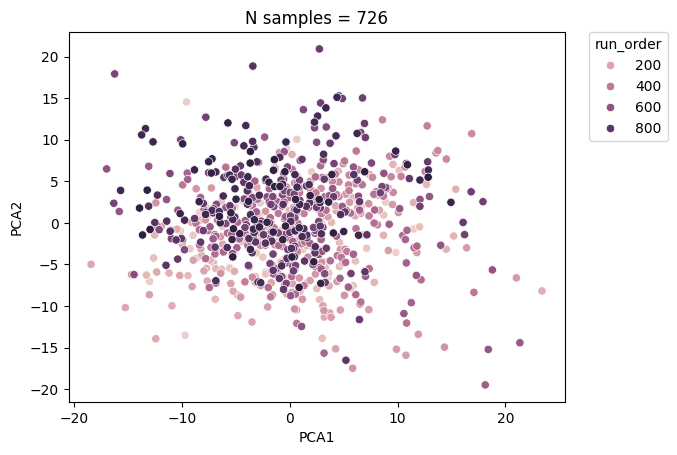

In [23]:
plot_pca(embedding0,main_metadata,col_name='run_order',yes_umap=False)

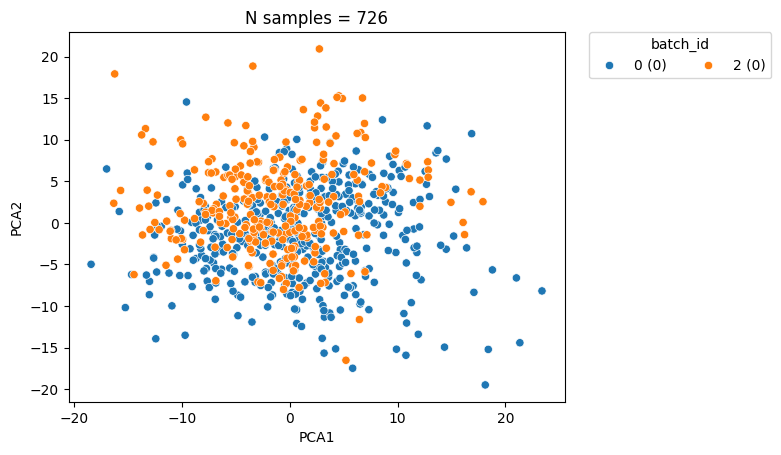

In [25]:
plot_pca(embedding0,main_metadata,col_name='batch_id',yes_umap=False)

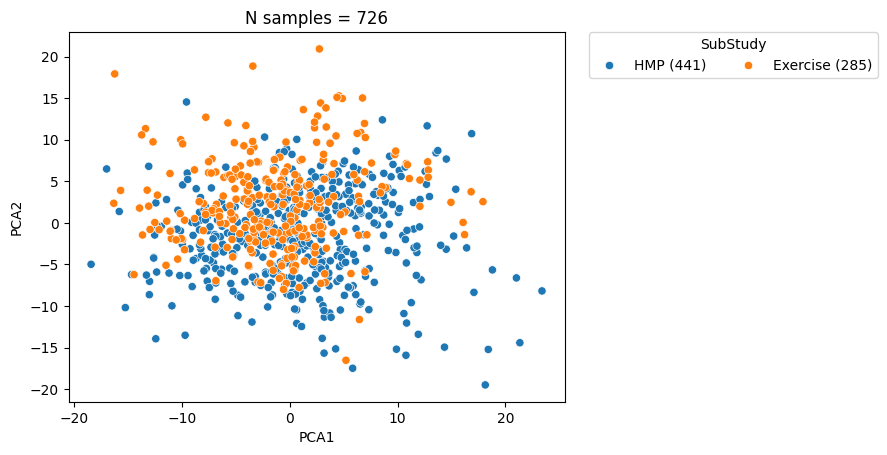

In [26]:
plot_pca(embedding0,main_metadata,col_name='SubStudy',yes_umap=False)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
main_matrix_scaled = scaler.fit_transform(main_matrix.T)
main_matrix_scaled = pd.DataFrame(main_matrix_scaled, index=main_matrix.columns, columns=main_matrix.index)

In [28]:
# how many missing values in the data?

main_matrix_scaled.isna().sum().sum()

0

In [42]:
embedding0s = generate_pca_embedding(main_matrix_scaled.T)
embedding1s = generate_umap_embedding(main_matrix_scaled.T)

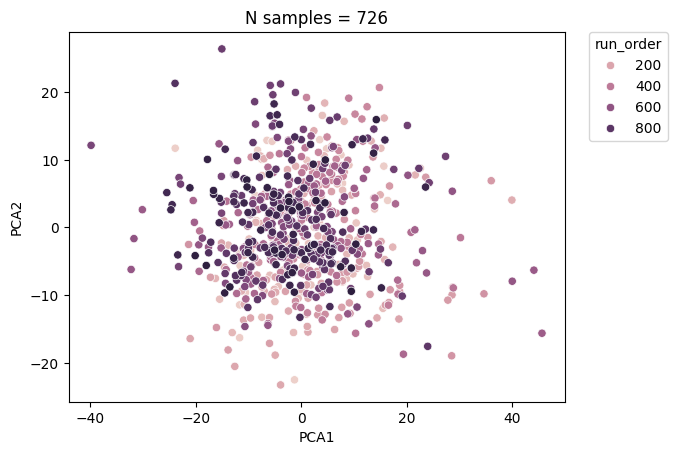

In [43]:
plot_pca(embedding0s,main_metadata,col_name='run_order',yes_umap=False)

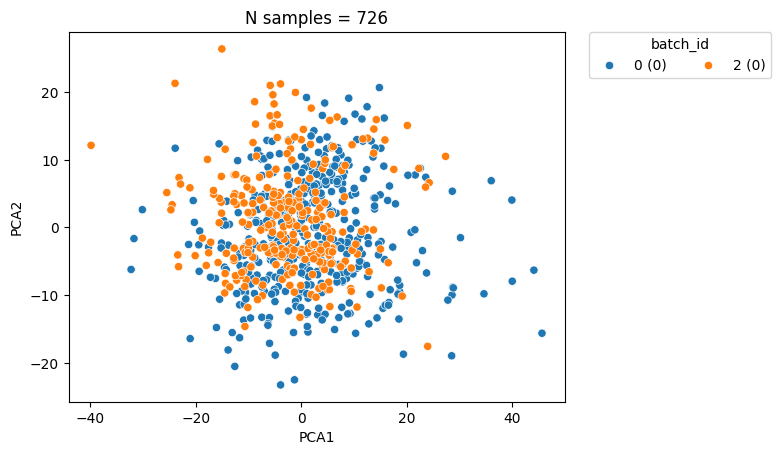

In [44]:
plot_pca(embedding0s,main_metadata,col_name='batch_id',yes_umap=False)

## Create the Train and Val datasets

In [29]:
data_matrix = pd.DataFrame(index=x_rcc_test.columns, columns=main_metadata.index)
data_matrix.loc[common_feats] = main_matrix.copy()
data_matrix.fillna(data_matrix.mean(),inplace=True)

scaler = StandardScaler()
data_matrix = scaler.fit_transform(data_matrix.T).T
data_matrix = pd.DataFrame(data_matrix, index=x_rcc_test.columns, columns=main_metadata.index)

In [31]:
data_matrix.T.to_csv(os.path.join(main_dir,'finetune_ready_data_matrix.csv'))

In [33]:

main_metadata.to_csv(os.path.join(main_dir,'finetune_ready_metadata.csv'))

In [54]:
train_samples = healthy_hmp.index
val_samples = baseline_exercise.index

train_data = data_matrix[train_samples].T
val_data = data_matrix[val_samples].T

train_metadata = main_metadata.loc[train_samples].copy()
val_metadata = main_metadata.loc[val_samples].copy()

data_dir = os.path.join(main_dir, 'data_v3')
os.makedirs(data_dir, exist_ok=True)

train_data.to_csv(os.path.join(data_dir, 'X_stanford-hmp_train.csv'))
val_data.to_csv(os.path.join(data_dir, 'X_stanford-hmp_val.csv'))

train_metadata.to_csv(os.path.join(data_dir, 'y_stanford-hmp_train.csv'))
val_metadata.to_csv(os.path.join(data_dir, 'y_stanford-hmp_val.csv'))


In [50]:
baseline_exercise

,subject ID,Study,Race,Age,BMI,SSPG,IR_IS_classification,CollectionDate,Event,Event_Note1,Event_Note2,Event_Note3,SubStudy,file name,mzml_file,timestamp,Ref,runtime_hour,batch_id,run_order
mzml_file,,,,,,,,,,,,,,,,,,,,


In [131]:
# get a list of the unique subject IDs
subject_ids = main_metadata['subject ID'].unique()
chosen_samples = []
for id in subject_ids:
    # get the subset of the data for the subject ID
    subset = main_metadata[main_metadata['subject ID'] == id]
    # remove the rows without BMI
    subset = subset[~subset['BMI'].isna()]
    # check if the subset has more than 1 row
    if subset.shape[0] == 0:
        continue

    # if subset.shape[0] == 1:
        # chosen_samples.append(subset.index[0])
        # continue

    # if the subStudy is HMP, choose the sample with the lowest value in the CollectionDate column

    if subset['SubStudy'].iloc[0] == 'HMP':
        chosen_samples.append(subset[subset['CollectionDate'] == subset['CollectionDate'].min()].index[0])
        continue
    elif subset['SubStudy'].iloc[0] == 'Exercise':
        # continue
        baseline_subset = subset[subset['Event_Note1'] == 'Baseline']
        if baseline_subset.shape[0] == 0:
            continue
        elif baseline_subset.shape[0] == 1:
            chosen_samples.append(baseline_subset.index[0])
        else:
            print('duplicate baselines for subject ID:', id)
            chosen_samples.append(baseline_subset.index[0])
            # chosen_samples.append(baseline_subset[baseline_subset['CollectionDate'] == baseline_subset['CollectionDate'].min()].index[0])


duplicate baselines for subject ID: ZOZOW1T


In [132]:
len(chosen_samples)

56

In [123]:
len(subject_ids)

58

In [133]:
chosen_samples

['ZN3TBJM-01_HILIC-pos-B1.mzML',
 'ZNED4XZ-01_HILIC-pos-B1.mzML',
 'ZLZNCLZ-01_HILIC-pos-B1.mzML',
 'ZLZQMEV-01_HILIC-pos-B1.mzML',
 'ZN0JE53-02_HILIC-pos-B1.mzML',
 'ZMGT937-01_HILIC-pos-B1.mzML',
 'ZO94RDZ-02_HILIC-pos-B1.mzML',
 'ZNQOVZV-01_HILIC-pos-B1.mzML',
 'ZOBX723-1013_HILIC-pos-B1.mzML',
 'ZJXC41N-03_HILIC-pos-B2.mzML',
 'ZMBVNFM-01_HILIC-pos-B1.mzML',
 'ZN9YTFN-01_HILIC-pos-B1.mzML',
 'ZO5QFNX-01_HILIC-pos-B1.mzML',
 'ZLYEM2C-01_HILIC-pos-B1.mzML',
 'ZOQSGYW-03_HILIC-pos-B1.mzML',
 'ZOQM06Q-1011_HILIC-pos-B1.mzML',
 'ZLTUJTN-05_HILIC-pos-B2.mzML',
 'ZJTKAE3-02_HILIC-pos-B2.mzML',
 'ZLGD9M0-05_HILIC-pos-B2.mzML',
 'ZL9BTWF-06_HILIC-pos-B2.mzML',
 'ZMBH10Z-01_HILIC-pos-B2.mzML',
 'ZK112BX-01_HILIC-pos-B2.mzML',
 'ZL63I8R-03_HILIC-pos-B2.mzML',
 'ZM7JY3G-01_HILIC-pos-B2.mzML',
 'ZLPZS0H-05_HILIC-pos-B2.mzML',
 'ZKVR426-02_HILIC-pos-B2.mzML',
 'ZK4CK8Y-01_HILIC-pos-B2.mzML',
 'ZO3XSJN-01_HILIC-pos-B2.mzML',
 'ZKFV71L-02_HILIC-pos-B2.mzML',
 'ZM8YXDM-01_HILIC-pos-B2.mzML',
 'ZLPR

In [134]:
chosen_metadata = main_metadata.loc[chosen_samples].copy()
chosen_matrix = main_matrix[chosen_samples].T

In [135]:

pca3 = PCA(n_components=2)

pca_embedding3 = pca3.fit_transform(chosen_matrix)

In [136]:
mapper3 = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2)

embedding3 = mapper3.fit_transform(chosen_matrix)

Text(0.5, 1.0, '"Baseline" samples = 56, peaks = 1767')

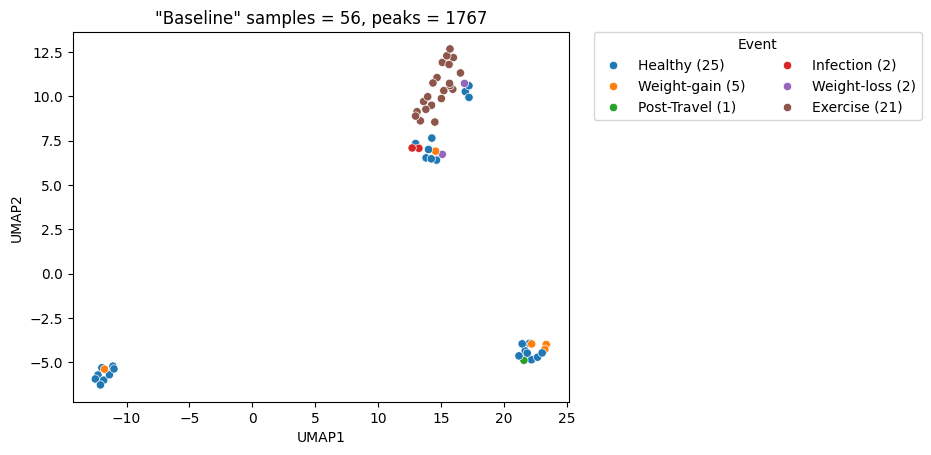

In [142]:
col_name = 'Event'
sns.scatterplot(x=embedding3[:,0], y=embedding3[:,1], hue=chosen_metadata[col_name])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# add counts to the legend
handles, labels = plt.gca().get_legend_handles_labels()
if exercise_samples[col_name].nunique() < 15:
    labels = [f'{x} ({chosen_metadata[chosen_metadata[col_name]==x].shape[0]})' for x in labels]
    plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name,
           ncol=2)  # ncol=2 makes the legend have 2 columns

# add the number of samples to the title
plt.title(f'"Baseline" samples = {chosen_metadata[~chosen_metadata[col_name].isna()].shape[0]}, peaks = {hmp_matrix.shape[1]}')


Text(0.5, 1.0, '"Baseline" samples = 56, peaks = 1767')

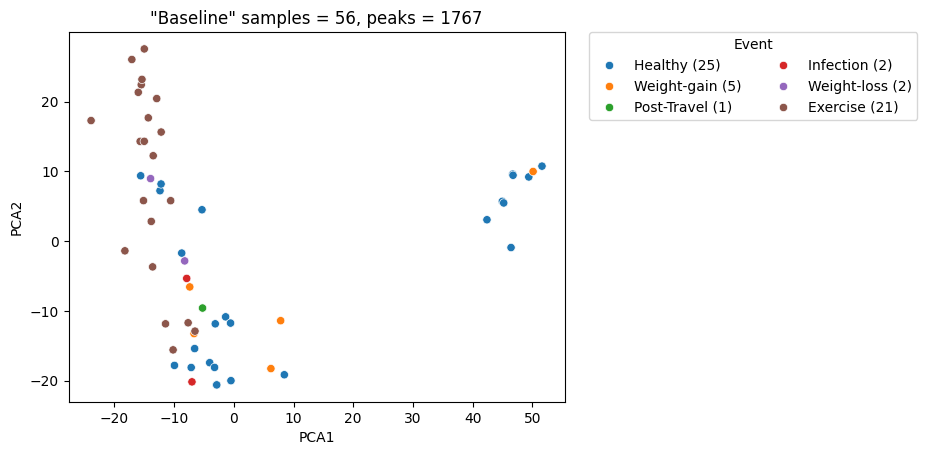

In [141]:
col_name = 'Event'
sns.scatterplot(x=pca_embedding3[:,0], y=pca_embedding3[:,1], hue=chosen_metadata[col_name])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name)
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# add counts to the legend
handles, labels = plt.gca().get_legend_handles_labels()
if exercise_samples[col_name].nunique() < 15:
    labels = [f'{x} ({chosen_metadata[chosen_metadata[col_name]==x].shape[0]})' for x in labels]
    plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name,
           ncol=2)  # ncol=2 makes the legend have 2 columns

# add the number of samples to the title
plt.title(f'"Baseline" samples = {chosen_metadata[~chosen_metadata[col_name].isna()].shape[0]}, peaks = {hmp_matrix.shape[1]}')


## Scaling the data for the chosen samples and prep for finetune with pretrained model

In [152]:
from sklearn.preprocessing import StandardScaler

data_matrix = pd.DataFrame(index=x_rcc_test.columns, columns=chosen_metadata.index)
data_matrix.loc[common_feats] = chosen_matrix.T.copy()
data_matrix.fillna(data_matrix.mean(),inplace=True)

scaler = StandardScaler()
data_matrix = scaler.fit_transform(data_matrix.T).T
data_matrix = pd.DataFrame(data_matrix, index=x_rcc_test.columns, columns=chosen_metadata.index)

In [155]:
mapper4 = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2)

embedding4 = mapper4.fit_transform(data_matrix.T)

Text(0.5, 1.0, '"Baseline" after StdScale samples = 56, peaks = 1767')

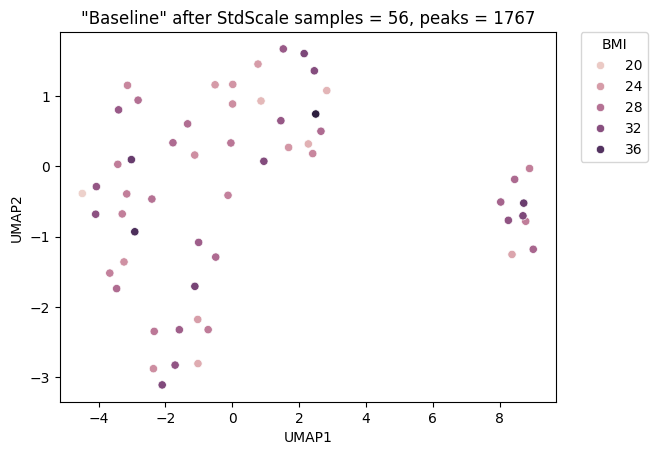

In [158]:
col_name = 'BMI'
sns.scatterplot(x=embedding4[:,0], y=embedding4[:,1], hue=chosen_metadata[col_name])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# add counts to the legend
handles, labels = plt.gca().get_legend_handles_labels()
if exercise_samples[col_name].nunique() < 15:
    labels = [f'{x} ({chosen_metadata[chosen_metadata[col_name]==x].shape[0]})' for x in labels]
    plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name,
           ncol=2)  # ncol=2 makes the legend have 2 columns

# add the number of samples to the title
plt.title(f'"Baseline" after StdScale samples = {chosen_metadata[~chosen_metadata[col_name].isna()].shape[0]}, peaks = {hmp_matrix.shape[1]}')


In [162]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)


y = chosen_metadata
X = data_matrix.T
y_target = chosen_metadata['SubStudy']

data_dir = os.path.join(main_dir, 'data_v1')

for i, (train_index, test_index) in enumerate(skf.split(X, y_target)):
    fold_dir = os.path.join(data_dir, f'fold_{i}')
    os.makedirs(fold_dir, exist_ok=True)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train.to_csv(os.path.join(fold_dir, f'X_stanford_bs_train.csv'))
    X_test.to_csv(os.path.join(fold_dir, f'X_stanford_bs_val.csv'))
    y_train.to_csv(os.path.join(fold_dir, f'y_stanford_bs_train.csv'))
    y_test.to_csv(os.path.join(fold_dir, f'y_stanford_bs_val.csv'))